# Constants

In [ ]:
DRAWING_FILENAME = 'drawing.png'

# Dataset download

https://www.kaggle.com/code/ashenonebot1/handwritten-digits-letters-classification

In [ ]:
! mkdir /root/.kaggle/
! mv ./kaggle.json /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
mv: cannot stat './kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d crawford/emnist

Dataset URL: https://www.kaggle.com/datasets/crawford/emnist
License(s): CC0-1.0
emnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip emnist.zip

Archive:  emnist.zip
replace emnist-balanced-mapping.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#  Model



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [ ]:
train_dataset = pd.read_csv('emnist-letters-train.csv', header=None)
test_dataset = pd.read_csv('emnist-letters-test.csv', header=None)

num_columns = 785

# Create column names
columns = ['label'] + list(range(1, num_columns))

# Assign column names to the DataFrames
train_dataset.columns = columns
test_dataset.columns = columns

# Reset index
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

# Extract features and labels
x_train = train_dataset.drop(['label'], axis='columns')
y_train = train_dataset['label']
x_test = test_dataset.drop(['label'], axis='columns')
y_test = test_dataset['label']

# Normalize features
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train - 1, y_test - 1

# Display the first few rows of the DataFrame
print(*train_dataset.head(2))
# print(train_dataset.head(0))

label 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 27

In [ ]:
num_to_char = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G',
    7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N',
    14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U',
    21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(26, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2775/2775 [==============================] - 22s 8ms/step - loss: 0.9497 - accuracy: 0.7180
Epoch 2/5
2775/2775 [==============================] - 13s 5ms/step - loss: 0.5918 - accuracy: 0.8185
Epoch 3/5
2775/2775 [==============================] - 20s 7ms/step - loss: 0.5186 - accuracy: 0.8390
Epoch 4/5
2775/2775 [==============================] - 21s 7ms/step - loss: 0.4776 - accuracy: 0.8513
Epoch 5/5
2775/2775 [==============================] - 15s 5ms/step - loss: 0.4528 - accuracy: 0.8570


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


463/463 - 2s - loss: 0.4351 - accuracy: 0.8621 - 2s/epoch - 4ms/step


[0.435128390789032, 0.8620945811271667]

# Draw Canvas

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<main style="margin: auto; display: flex; flex-direction: column; gap: 20px">
  <div style="position: relative">
    <canvas style="border: 2px solid black"></canvas>
    <div
      class="top-margin"
      style="height: 2px; margin-left: 2px; width: 100%%; position: absolute"
    ></div>
    <div
      class="bottom-margin"
      style="height: 2px; margin-left: 2px; width: 100%%; position: absolute"
    ></div>
  </div>
  <div style="display: flex; justify-content: center; gap: 5px">
    <button
      id="predict"
      style="
        border-radius: 50px;
        height: 40px;
        width: 150px;
        box-shadow: 0 0 10px 0 rgba(0, 0, 0, 0.2);
        background-color: black;
        border: 0;
        color: white;
        transition: all 0.18s ease-in-out;
      "
    >
      Predecir
    </button>
    <button
      id="delete"
      style="
        border-radius: 50px;
        height: 40px;
        width: 150px;
        box-shadow: 0 0 10px 0 rgba(0, 0, 0, 0.2);
        background-color: white;
        border: 0;
        color: black;
        transition: all 0.18s ease-in-out;
      "
    >
      Borrar
    </button>
  </div>
</main>

<script>
  width = %d
  height = %d
  lineWidth = %d
  marginsPadding = "%s"
  marginsColor = "%s"


  let topMargin = document.querySelector(".top-margin");
  let bottomMargin = document.querySelector(".bottom-margin");

  topMargin.style.top = marginsPadding;
  bottomMargin.style.bottom = marginsPadding;

  topMargin.style.backgroundColor = marginsColor;
  bottomMargin.style.backgroundColor = marginsColor;

  let canvas = document.querySelector("canvas");
  canvas.width = width;
  canvas.height = height;
  canvas.style.backgroundColor = "white";

  let main = document.querySelector("main");
  main.style.width = width + "px";
  main.style.height = height + "px";

  let ctx = canvas.getContext("2d");
  ctx.lineJoin = ctx.lineCap = "round";
  ctx.lineWidth = lineWidth;

  let button = document.querySelector("#predict");
  let deleteButton = document.querySelector("#delete");

  let mouse = { x: 0, y: 0 };

  canvas.addEventListener("mousemove", function (e) {
    mouse.x = e.pageX - this.parentElement.offsetLeft;
    mouse.y = e.pageY - this.parentElement.offsetTop;
  });

  canvas.onmousedown = () => {
    ctx.beginPath();
    ctx.moveTo(mouse.x, mouse.y);
    canvas.addEventListener("mousemove", onPaint);
  };

  canvas.onmouseup = () => {
    canvas.removeEventListener("mousemove", onPaint);
  };

  let onPaint = () => {
    ctx.lineTo(mouse.x, mouse.y);
    ctx.stroke();
  };

  deleteButton.addEventListener("click", () => {
    ctx.clearRect(0, 0, canvas.width, canvas.height);
  });

  let data = new Promise((resolve) => {
    button.onclick = () => {
      // Guarda lo que se ha dibujado en el canvas
      let imageData = canvas.toDataURL("image/jpg");

      // Establece el color de fondo blanco
      ctx.fillStyle = "white";
      ctx.fillRect(0, 0, canvas.width, canvas.height);

      // Dibuja la imagen sobre el fondo blanco
      let img = new Image();
      img.onload = function () {
        ctx.drawImage(img, 0, 0);

        // Resuelve la promesa con los datos de la imagen completa
        resolve(canvas.toDataURL("image/jpg"));
      };
      img.src = imageData;
    };
  });
</script>
"""

def draw(filename, w, h, line_width, margins_padding, margins_color):
  display(HTML(canvas_html % (w, h, line_width, margins_padding, margins_color)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

# Text Image Preprocess

In [ ]:
import imutils
from imutils.contours import sort_contours

def preprocessTextImage(filename):
  # load the input image from disk, convert it to grayscale, and blur
  # it to reduce noise
  image = cv2.imread(filename)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  # perform edge detection, find contours in the edge map, and sort the
  # resulting contours from left-to-right
  edged = cv2.Canny(blurred, 30, 150)
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts, method="left-to-right")[0]

  # initialize the list of contour bounding boxes and associated
  # characters that we'll be OCR'ing
  chars = []

  # loop over the contours
  for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
      # extract the character and threshold it to make the character
      # appear as *white* (foreground) on a *black* background, then
      # grab the width and height of the thresholded image
      roi = gray[y:y + h, x:x + w]
      thresh = cv2.threshold(roi, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
      (tH, tW) = thresh.shape
      # if the width is greater than the height, resize along the
      # width dimension
      if tW > tH:
        thresh = imutils.resize(thresh, width=28)
      # otherwise, resize along the height
      else:
        thresh = imutils.resize(thresh, height=28)

      # re-grab the image dimensions (now that its been resized)
      # and then determine how much we need to pad the width and
      # height such that our image will be 28x28
      (tH, tW) = thresh.shape
      extra_padding = 5
      # pad the image and force 32x32 dimensions
      padded = cv2.copyMakeBorder(thresh, top=extra_padding, bottom=extra_padding,
        left=extra_padding, right=extra_padding, borderType=cv2.BORDER_CONSTANT,
        value=(0, 0, 0))
      padded = cv2.resize(padded, (28, 28))
      # prepare the padded image for classification via our
      # handwriting OCR model
      padded = padded.astype("float32") / 255.0
      padded = np.expand_dims(padded, axis=-1)
      # update our list of characters that will be OCR'd

      flipped = cv2.flip(padded, 1)
      center = (flipped.shape[1] // 2, flipped.shape[0] // 2)
      rotated = cv2.rotate(flipped, cv2.ROTATE_90_COUNTERCLOCKWISE, center)

      chars.append((rotated, (x, y, w, h)))

  # extract the bounding box locations and padded characters
  boxes = [b[1] for b in chars]
  chars = np.array([c[0] for c in chars], dtype="float32")

  return (chars, boxes, image)

# App

1/1 [==============================] - 0s 34ms/step


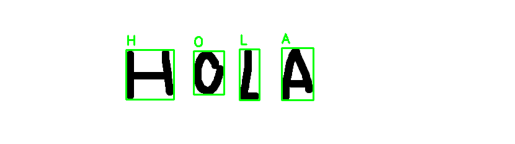

In [ ]:
draw(filename=DRAWING_FILENAME, w=800, h=200, line_width=12, margins_padding="30%", margins_color="green")
(chars, boxes, image) = preprocessTextImage(filename=DRAWING_FILENAME)

result = ''
for c in chars:
  formatted_char = c.flatten().reshape(-1, 28*28)
  probabilities = model.predict(formatted_char)
  prediction = np.argmax(probabilities)
  result += num_to_char.get(prediction)

for i, (x, y, w, h) in enumerate(boxes):
  # draw the prediction on the image
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  cv2.putText(image, result[i], (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.7,  (0, 255, 0), 2)

# show the image
plt.imshow(image)
plt.axis('off')
plt.show()
